In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = "svg"

from IPython.display import display, Math, Latex

data = pd.read_csv("fires_thefts.csv", names=["x", "y"])

x = data["x"].to_numpy()
y = data["y"].to_numpy()

# Hipoteza: funkcja liniowa jednej zmiennej
def h(theta, x):
    return theta[0] + theta[1] * x

#  Funkcja kosztu
def J(h, theta, x, y):
    m = len(y)
    return 1.0 / (2 * m) * sum((h(theta, x[i]) - y[i]) ** 2 for i in range(m))

# Wyświetlanie macierzy w LaTeX-u
def LatexMatrix(matrix):
    ltx = r"\left[\begin{array}"
    m, n = matrix.shape
    ltx += "{" + ("r" * n) + "}"
    for i in range(m):
        ltx += r" & ".join([("%.4f" % j.item()) for j in matrix[i]]) + r" \\ "
    ltx += r"\end{array}\right]"
    return ltx

def gradient_descent(h, cost_fun, theta, x, y, alpha, eps):
    current_cost = cost_fun(h, theta, x, y)
    history = [
        [current_cost, theta]
    ]  # zapiszmy wartości kosztu i parametrów, by potem zrobić wykres
    m = len(y)
    while True:
        new_theta = [
            theta[0] - alpha / float(m) * sum(h(theta, x[i]) - y[i] for i in range(m)),
            theta[1]
            - alpha / float(m) * sum((h(theta, x[i]) - y[i]) * x[i] for i in range(m)),
        ]
        theta = new_theta  # jednoczesna aktualizacja - używamy zmiennej tymczasowej
        try:
            prev_cost = current_cost
            current_cost = cost_fun(h, theta, x, y)
        except OverflowError:
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        history.append([current_cost, theta])
    return theta, history



In [28]:
best_theta, history = gradient_descent(h, J, [0.0, 0.0], x, y, alpha=0.003, eps=0.000001)

display(
    Math(
        r"\large\textrm{Wynik:}\quad \theta = "
        + LatexMatrix(np.matrix(best_theta).reshape(2, 1))
        + (r" \quad J(\theta) = %.4f" % history[-1][0])
        + r" \quad \textrm{po %d iteracjach}" % len(history)
    )
)


<IPython.core.display.Math object>

In [19]:

epss = [10.0**(-n) for n in range(0, 12)]
alpha=0.003
costs = []
lengths = []
for eps in epss:
    theta_best, history = gradient_descent(
        h, J, [0.0, 0.0], x, y, alpha, eps)
    cost = history[-1][0]
    steps = len(history)
    print(f"{eps=:7},  {cost=:15.3f},  {steps=:6}")
    costs.append(cost)
    lengths.append(steps)



eps=    1.0,  cost=        231.741,  steps=     4
eps=    0.1,  cost=        226.569,  steps=    52
eps=   0.01,  cost=        185.031,  steps=  1115
eps=  0.001,  cost=        180.872,  steps=  2179
eps= 0.0001,  cost=        180.456,  steps=  3242
eps=  1e-05,  cost=        180.415,  steps=  4306
eps=  1e-06,  cost=        180.411,  steps=  5369
eps=  1e-07,  cost=        180.410,  steps=  6433
eps=  1e-08,  cost=        180.410,  steps=  7496
eps=  1e-09,  cost=        180.410,  steps=  8560
eps=  1e-10,  cost=        180.410,  steps=  9623
eps=  1e-11,  cost=        180.410,  steps= 10687


In [20]:
def eps_cost_steps_plot(eps, costs, steps):
    """Wykres kosztu i liczby kroków w zależności od eps"""
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(eps, steps, "--s", color="green")
    ax2.plot(eps, costs, ":o", color="orange")
    ax1.set_xscale("log")
    ax1.set_xlabel("eps")
    ax1.set_ylabel("liczba kroków", color="green")
    ax2.set_ylabel("koszt", color="orange")
    plt.show()


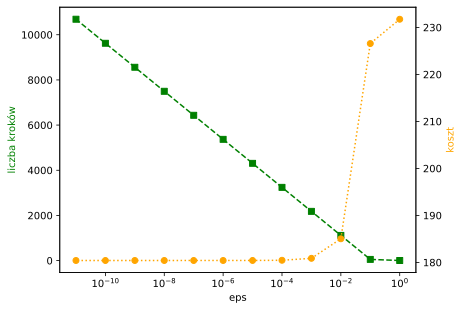

In [21]:
eps_cost_steps_plot(epss, costs, lengths)


In [22]:
example_x = [50, 100, 200]
print(best_theta)
example_y = [h(best_theta, ex) for ex in example_x]
for i in range(3):
    print(f"Liczba pozarów - {example_x[i]} "
    f"Przewidywalna liczba włamań - {example_y[i]}")

[16.835521154474677, 1.3214970549417684]
Liczba pozarów - 50 Przewidywalna liczba włamań - 82.91037390156309
Liczba pozarów - 100 Przewidywalna liczba włamań - 148.98522664865152
Liczba pozarów - 200 Przewidywalna liczba włamań - 281.13493214282835
